In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam


class LeNet:

    def __init__(self, width, height):
        
        # dimensions of our images.
        self.width = width
        self.height = height
        input_shape = (self.width, self.height, 3)

        model = Sequential()
        model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        
        model.add(Flatten())
        model.add(Dense(120, activation='relu'))
        model.add(Dense(84, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        optimizer = Adam(lr=0.0001)
        model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])        
        self.model = model

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger

training_data_dir = "data/data"
# validation_data_dir = "data/"
# test_data_dir = "data/test"

# Hyperparams
IMAGE_SIZE = 256
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 4
BATCH_SIZE = 16
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# Data augmentation
training_data_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, validation_split=0.2)

# Data preparation
training = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training", seed=4)

validation = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation", seed=4)


Found 12565 images belonging to 2 classes.
Found 3140 images belonging to 2 classes.


In [9]:
lenet = LeNet(IMAGE_WIDTH, IMAGE_HEIGHT)

In [10]:
lenet.model.fit_generator(
    training,
    steps_per_epoch=len(training.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation,
    validation_steps=len(validation.filenames) // BATCH_SIZE,
    callbacks=[CSVLogger("training_log_lenet.csv", append=False, separator=",")], 
    verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/4
491/785 [=================>............] - ETA: 1:17 - loss: 0.3012 - accuracy: 0.8800

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


785/785 [==============================] - 261s 332ms/step - loss: 0.2880 - accuracy: 0.8868 - val_loss: 0.2570 - val_accuracy: 0.8957
Epoch 2/4
785/785 [==============================] - 262s 333ms/step - loss: 0.2417 - accuracy: 0.9065 - val_loss: 0.2513 - val_accuracy: 0.9018
Epoch 3/4
785/785 [==============================] - 257s 327ms/step - loss: 0.2219 - accuracy: 0.9157 - val_loss: 0.2529 - val_accuracy: 0.9002
Epoch 4/4
785/785 [==============================] - 255s 325ms/step - loss: 0.2075 - accuracy: 0.9201 - val_loss: 0.2250 - val_accuracy: 0.9075


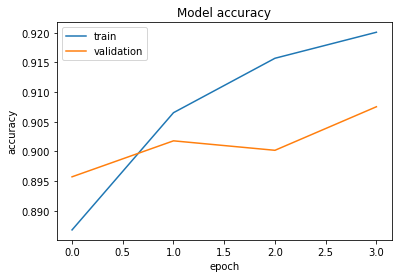

In [12]:
from matplotlib import pyplot as plt
plt.plot(lenet.model.history.history['accuracy'])
plt.plot(lenet.model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

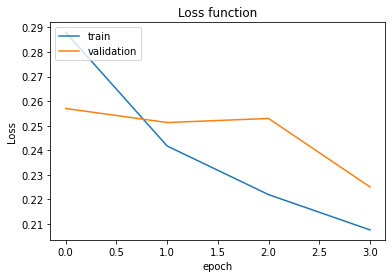

In [13]:
from matplotlib import pyplot as plt
plt.plot(lenet.model.history.history['loss'])
plt.plot(lenet.model.history.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [15]:
validation_ = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary",
    shuffle=False,
    subset="validation", seed=4)

Found 3140 images belonging to 2 classes.


In [16]:
probabilities = lenet.model.predict_generator(validation_, verbose=1, steps=3140)

Instructions for updating:
Please use Model.predict, which supports generators.
3140/3140 [==============================] - 50s 16ms/step


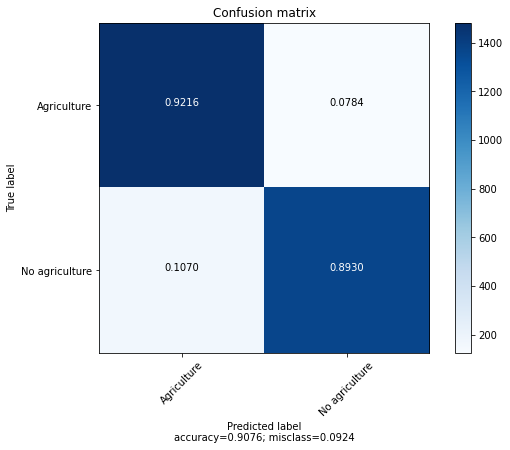

In [18]:
import numpy
from sklearn.metrics import confusion_matrix

expected = validation.classes
predicted = numpy.round(probabilities)
results = confusion_matrix(expected, predicted[:,0])
labels = ['Agriculture', 'No agriculture']

plot_confusion_matrix(results, labels)